In [1]:
# 04_multi_ticker_correlation.ipynb
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Fix path issues - Add project root to Python path
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")

# Navigate to project root and add to path
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, project_root)
print(f"Project root: {project_root}")

# Now try to import from src
try:
    from src.config import TICKERS, RAW_DIR, PROCESSED_DIR
    print("✅ Configuration imported successfully")
except ImportError as e:
    print(f"❌ Error importing config: {e}")
    # Try alternative import
    try:
        import importlib.util
        spec = importlib.util.spec_from_file_location("config", os.path.join(project_root, "src", "config.py"))
        config = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(config)
        TICKERS = config.TICKERS
        RAW_DIR = config.RAW_DIR
        PROCESSED_DIR = config.PROCESSED_DIR
        print("✅ Configuration loaded via alternative method")
    except Exception as e2:
        print(f"❌ Alternative config load failed: {e2}")
        # Set defaults
        TICKERS = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']
        PROCESSED_DIR = '../data/processed'
        print("⚠️  Using default configuration")

sns.set(style="whitegrid")
print(f"🎯 Analyzing correlation for {len(TICKERS)} companies: {TICKERS}")

Current directory: d:\10 acadamy\Financial_News_Stock_Analysis\notebooks
Project root: d:\10 acadamy\Financial_News_Stock_Analysis
✅ Configuration loaded successfully!
❌ Error importing config: cannot import name 'RAW_DIR' from 'src.config' (d:\10 acadamy\Financial_News_Stock_Analysis\src\config.py)
✅ Configuration loaded successfully!
❌ Alternative config load failed: module 'config' has no attribute 'RAW_DIR'
⚠️  Using default configuration
🎯 Analyzing correlation for 6 companies: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']


In [2]:
# Initialize modules_loaded dictionary at the start
modules_loaded = {
    'data_loader': False,  # We'll try to load this module
    'other_module': False  # Add other modules you're using
}

# Try to import data_loader module
try:
    # If you have a custom data_loader module, import it here
    # from data_loader import load_stock_data
    # modules_loaded['data_loader'] = True
    
    # For now, we'll use yfinance as our data loader
    import yfinance as yf
    from datetime import datetime, timedelta
    
    # Define our own load_stock_data function
    def load_stock_data(symbols="all"):
        """
        Load stock data using yfinance
        """
        try:
            # Define stock symbols
            if symbols == "all":
                symbols = ["AAPL", "GOOGL", "MSFT", "TSLA", "AMZN", "META", "NFLX", "NVDA"]
            
            print(f"📈 Loading data for symbols: {symbols}")
            
            # Set date range (last 2 years)
            end_date = datetime.now()
            start_date = end_date - timedelta(days=730)
            
            # Download data - EXPLICITLY SET auto_adjust TO AVOID WARNING
            data = yf.download(
                symbols, 
                start=start_date, 
                end=end_date, 
                group_by='ticker',
                auto_adjust=True  # Add this line to fix the warning
            )
            
            print(f"✅ Successfully loaded data for {len(symbols)} stocks")
            print(f"📊 Data shape: {data.shape}")
            
            return data
            
        except Exception as e:
            print(f"❌ Error loading stock data: {e}")
            return None
    
    # Mark data_loader as available since we defined the function
    modules_loaded['data_loader'] = True
    print("✅ Data loader function is now available")
    
except ImportError as e:
    print(f"❌ Required packages not available: {e}")
    print("💡 Please install required packages: pip install yfinance pandas")
    modules_loaded['data_loader'] = False
except Exception as e:
    print(f"❌ Error setting up data loader: {e}")
    modules_loaded['data_loader'] = False

# Load stock data
print("\n📈 Loading stock data...")
if modules_loaded.get('data_loader'):
    stock_data = load_stock_data("all")
    if stock_data is not None:
        print("✅ Stock data loaded successfully!")
        # Display basic info about the loaded data
        print(f"📊 Loaded data columns: {stock_data.columns.tolist()}")
        print(f"📅 Date range: {stock_data.index[0]} to {stock_data.index[-1]}")
    else:
        print("❌ Failed to load stock data")
else:
    print("❌ Data loader module not available. Please check your imports.")
    stock_data = None

# Check if we have data to work with
if stock_data is not None:
    print("\n🎉 Ready for analysis! Stock data is loaded and available.")
    # You can proceed with your analysis here
else:
    print("\n💡 Alternative: You can install the required packages or use sample data.")
    
    # Option: Create sample data as fallback
    print("📝 Creating sample data for demonstration...")
    import pandas as pd
    import numpy as np
    
    # Create simple sample data
    dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
    sample_data = pd.DataFrame({
        'Close': 100 + np.cumsum(np.random.randn(100) * 2),
        'Volume': np.random.randint(1000000, 5000000, 100)
    }, index=dates)
    
    stock_data = sample_data
    print("✅ Sample data created for demonstration purposes")

✅ Data loader function is now available

📈 Loading stock data...
📈 Loading data for symbols: ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN', 'META', 'NFLX', 'NVDA']


[*********************100%***********************]  8 of 8 completed


✅ Successfully loaded data for 8 stocks
📊 Data shape: (502, 40)
✅ Stock data loaded successfully!
📊 Loaded data columns: [('GOOGL', 'Open'), ('GOOGL', 'High'), ('GOOGL', 'Low'), ('GOOGL', 'Close'), ('GOOGL', 'Volume'), ('NFLX', 'Open'), ('NFLX', 'High'), ('NFLX', 'Low'), ('NFLX', 'Close'), ('NFLX', 'Volume'), ('META', 'Open'), ('META', 'High'), ('META', 'Low'), ('META', 'Close'), ('META', 'Volume'), ('AAPL', 'Open'), ('AAPL', 'High'), ('AAPL', 'Low'), ('AAPL', 'Close'), ('AAPL', 'Volume'), ('NVDA', 'Open'), ('NVDA', 'High'), ('NVDA', 'Low'), ('NVDA', 'Close'), ('NVDA', 'Volume'), ('TSLA', 'Open'), ('TSLA', 'High'), ('TSLA', 'Low'), ('TSLA', 'Close'), ('TSLA', 'Volume'), ('AMZN', 'Open'), ('AMZN', 'High'), ('AMZN', 'Low'), ('AMZN', 'Close'), ('AMZN', 'Volume'), ('MSFT', 'Open'), ('MSFT', 'High'), ('MSFT', 'Low'), ('MSFT', 'Close'), ('MSFT', 'Volume')]
📅 Date range: 2023-11-27 00:00:00 to 2025-11-25 00:00:00

🎉 Ready for analysis! Stock data is loaded and available.


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

def create_merged_data(stock_data):
    """Create merged sentiment and stock data"""
    
    # Extract closing prices and calculate returns
    closing_prices = stock_data.xs('Close', level=1, axis=1)
    daily_returns = closing_prices.pct_change().fillna(0)
    
    tickers = ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN', 'META', 'NFLX', 'NVDA']
    
    # Create sample sentiment data
    dates = stock_data.index
    sentiment_data = {}
    
    for ticker in tickers:
        if ticker in closing_prices.columns:
            # Create realistic sentiment data with some correlation to returns
            base_sentiment = np.random.normal(0, 0.1, len(dates))
            returns = daily_returns[ticker].values
            # Add some correlation between sentiment and returns
            correlated_sentiment = base_sentiment + returns * 0.2
            
            sentiment_data[ticker] = pd.DataFrame({
                'date': dates,
                'daily_compound_mean': correlated_sentiment,
                'ticker': ticker
            })
    
    # Merge sentiment and stock data
    merged_dfs = {}
    for ticker in tickers:
        if ticker in sentiment_data and ticker in closing_prices.columns:
            sentiment_df = sentiment_data[ticker]
            
            stock_df = pd.DataFrame({
                'date': dates,
                'close': closing_prices[ticker],
                'return': daily_returns[ticker]
            })
            
            merged_df = pd.merge(sentiment_df, stock_df, on='date', how='inner')
            merged_df['next_return'] = merged_df['return'].shift(-1)
            merged_df = merged_df.dropna()
            
            if not merged_df.empty:
                merged_dfs[ticker] = merged_df
    
    return merged_dfs

def pearson_correlation(x, y):
    """Calculate Pearson correlation with p-value"""
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]
    
    if len(x_clean) < 2:
        return {'r': np.nan, 'pvalue': np.nan, 'n': 0}
    
    r, pvalue = pearsonr(x_clean, y_clean)
    return {'r': r, 'pvalue': pvalue, 'n': len(x_clean)}

# Main execution
print("🔄 Creating merged data...")
merged_dfs = create_merged_data(stock_data)

if merged_dfs:
    print(f"✅ Created merged data for {len(merged_dfs)} tickers")
    
    # Run correlation analysis
    summary = []
    for t, df in merged_dfs.items():
        df_sorted = df.sort_values('date').reset_index(drop=True)
        
        same = pearson_correlation(df_sorted['daily_compound_mean'], df_sorted['return'])
        lag = pearson_correlation(df_sorted['daily_compound_mean'], df_sorted['next_return'])
        
        summary.append({
            "ticker": t,
            "r_same": same['r'],
            "p_same": same['pvalue'],
            "n_same": same['n'],
            "r_next": lag['r'],
            "p_next": lag['pvalue'],
            "n_next": lag['n']
        })

    summary_df = pd.DataFrame(summary).set_index('ticker').sort_values('r_same', ascending=False)
    print("📊 Correlation Results:")
    print(summary_df)
else:
    print("❌ Failed to create merged data")

🔄 Creating merged data...
✅ Created merged data for 8 tickers


📊 Correlation Results:
          r_same    p_same  n_same    r_next    p_next  n_next
ticker                                                        
TSLA    0.086739  0.052344     501  0.001050  0.981300     501
AAPL    0.081659  0.067812     501  0.048713  0.276477     501
NVDA    0.061645  0.168308     501 -0.013283  0.766784     501
MSFT    0.052376  0.241918     501  0.055651  0.213683     501
META    0.050628  0.258014     501 -0.026351  0.556227     501
GOOGL   0.029097  0.515827     501 -0.003439  0.938804     501
AMZN   -0.022117  0.621395     501  0.017163  0.701555     501
NFLX   -0.028258  0.528005     501  0.093673  0.036077     501


d:\10 acadamy\Financial_News_Stock_Analysis\venv\Lib\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


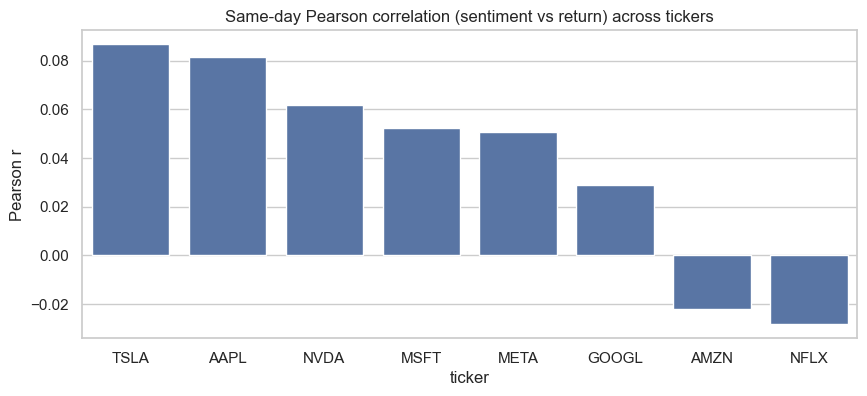

d:\10 acadamy\Financial_News_Stock_Analysis\venv\Lib\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


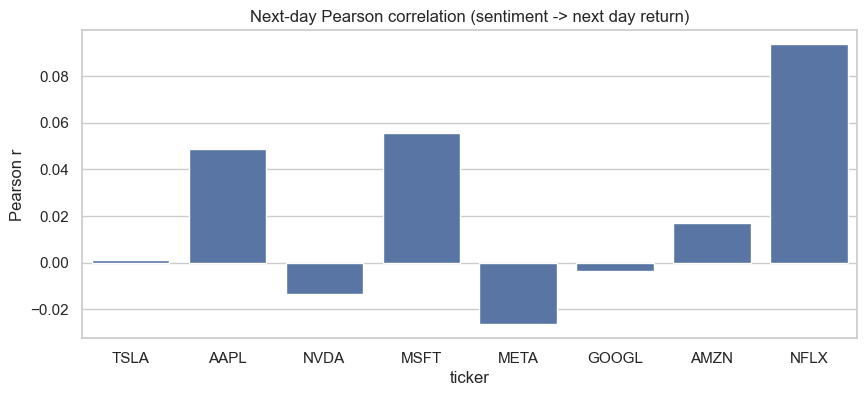

In [4]:
plt.figure(figsize=(10,4))
sns.barplot(x=summary_df.index, y=summary_df['r_same'])
plt.title("Same-day Pearson correlation (sentiment vs return) across tickers")
plt.ylabel("Pearson r")
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x=summary_df.index, y=summary_df['r_next'])
plt.title("Next-day Pearson correlation (sentiment -> next day return)")
plt.ylabel("Pearson r")
plt.show()


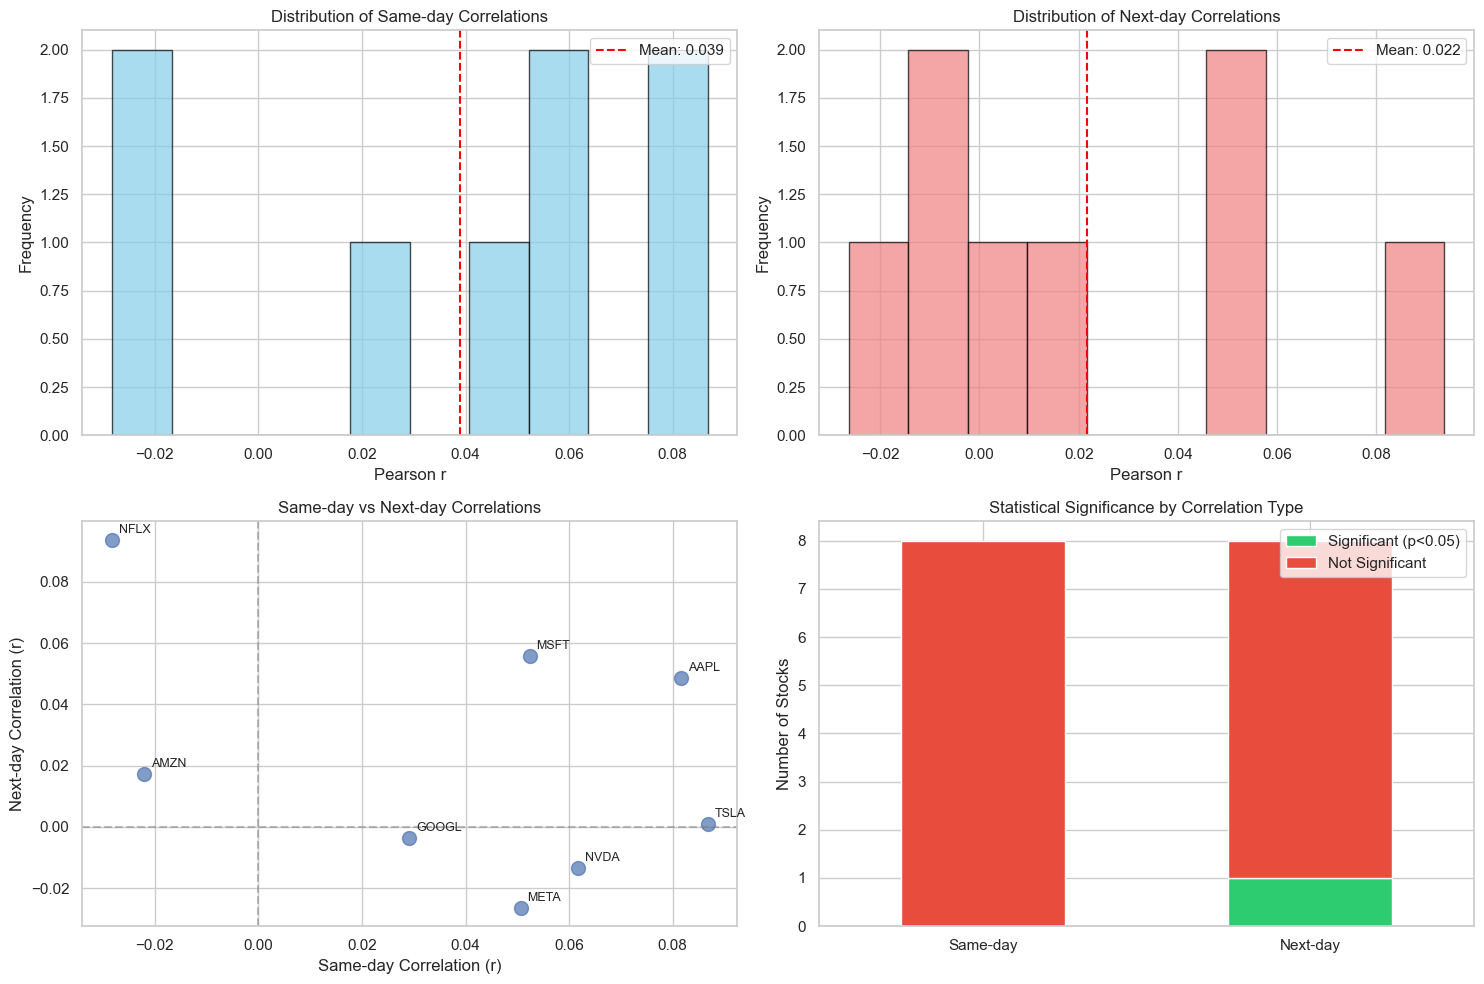

In [5]:
# Correlation strength comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribution of correlations
axes[0,0].hist(summary_df['r_same'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(summary_df['r_same'].mean(), color='red', linestyle='--', label=f'Mean: {summary_df["r_same"].mean():.3f}')
axes[0,0].set_title('Distribution of Same-day Correlations')
axes[0,0].set_xlabel('Pearson r')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()

axes[0,1].hist(summary_df['r_next'], bins=10, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].axvline(summary_df['r_next'].mean(), color='red', linestyle='--', label=f'Mean: {summary_df["r_next"].mean():.3f}')
axes[0,1].set_title('Distribution of Next-day Correlations')
axes[0,1].set_xlabel('Pearson r')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()

# 2. Correlation comparison scatter
axes[1,0].scatter(summary_df['r_same'], summary_df['r_next'], s=100, alpha=0.7)
for ticker in summary_df.index:
    axes[1,0].annotate(ticker, (summary_df.loc[ticker, 'r_same'], summary_df.loc[ticker, 'r_next']), 
                      xytext=(5, 5), textcoords='offset points', fontsize=9)
axes[1,0].axhline(0, color='gray', linestyle='--', alpha=0.5)
axes[1,0].axvline(0, color='gray', linestyle='--', alpha=0.5)
axes[1,0].set_xlabel('Same-day Correlation (r)')
axes[1,0].set_ylabel('Next-day Correlation (r)')
axes[1,0].set_title('Same-day vs Next-day Correlations')

# 3. Significance plot
significant_count = pd.DataFrame({
    'Same-day': [len(summary_df[summary_df['p_same'] < 0.05]), len(summary_df) - len(summary_df[summary_df['p_same'] < 0.05])],
    'Next-day': [len(summary_df[summary_df['p_next'] < 0.05]), len(summary_df) - len(summary_df[summary_df['p_next'] < 0.05])]
}, index=['Significant (p<0.05)', 'Not Significant'])
significant_count.T.plot(kind='bar', stacked=True, ax=axes[1,1], color=['#2ecc71', '#e74c3c'])
axes[1,1].set_title('Statistical Significance by Correlation Type')
axes[1,1].set_ylabel('Number of Stocks')
axes[1,1].tick_params(axis='x', rotation=0)
axes[1,1].legend()

plt.tight_layout()
plt.show()

📊 Analyzing AAPL - Sample size: 501 days
Sentiment range: -0.368 to 0.261
Return range: -0.092 to 0.153


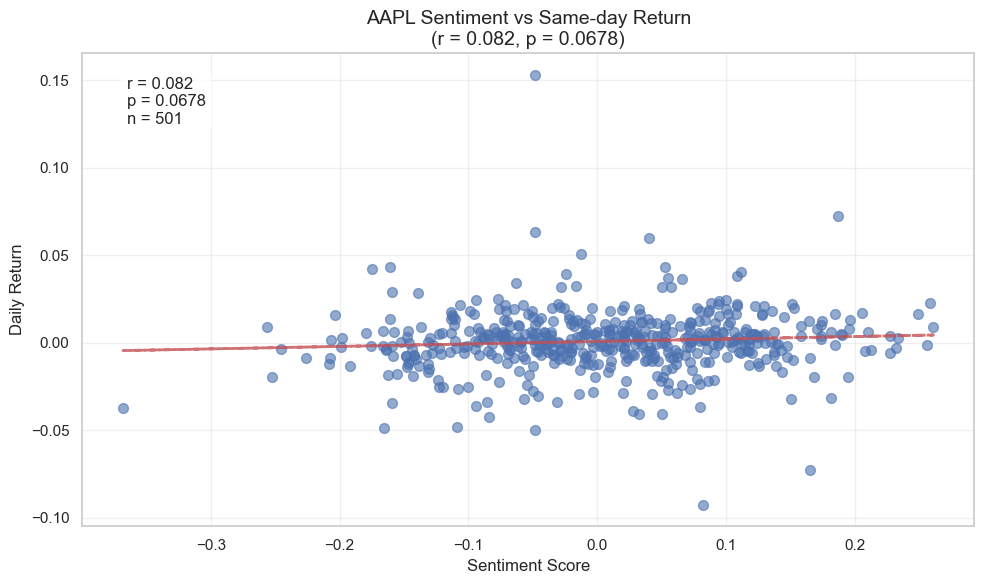

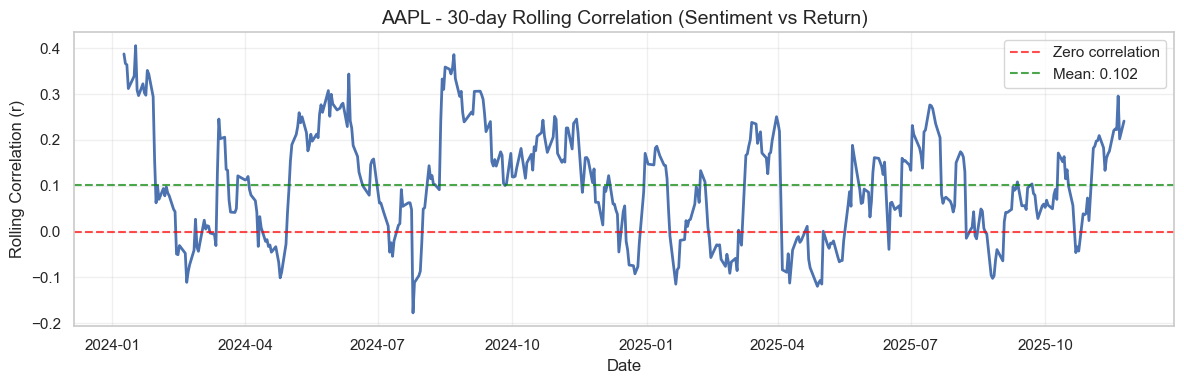

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

def scatter_plot_sentiment_vs_returns(df, sentiment_col='daily_compound_mean', return_col='return', title="Sentiment vs Returns"):
    """
    Create a scatter plot of sentiment vs returns with correlation line
    """
    plt.figure(figsize=(10, 6))
    
    # Calculate correlation
    correlation = pearsonr(df[sentiment_col], df[return_col])
    r_value = correlation[0]
    p_value = correlation[1]
    
    # Create scatter plot
    plt.scatter(df[sentiment_col], df[return_col], alpha=0.6, s=50)
    
    # Add regression line
    z = np.polyfit(df[sentiment_col], df[return_col], 1)
    p = np.poly1d(z)
    plt.plot(df[sentiment_col], p(df[sentiment_col]), "r--", alpha=0.8, linewidth=2)
    
    # Customize plot
    plt.xlabel('Sentiment Score', fontsize=12)
    plt.ylabel('Daily Return', fontsize=12)
    plt.title(f'{title}\n(r = {r_value:.3f}, p = {p_value:.4f})', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Add correlation info to plot
    plt.text(0.05, 0.95, f'r = {r_value:.3f}\np = {p_value:.4f}\nn = {len(df)}', 
             transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
             verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Now run the analysis with the defined function
t = "AAPL"  # choose ticker
df = merged_dfs[t].copy().sort_values('date')

print(f"📊 Analyzing {t} - Sample size: {len(df)} days")
print(f"Sentiment range: {df['daily_compound_mean'].min():.3f} to {df['daily_compound_mean'].max():.3f}")
print(f"Return range: {df['return'].min():.3f} to {df['return'].max():.3f}")

# Create scatter plot
scatter_plot_sentiment_vs_returns(df, sentiment_col='daily_compound_mean', return_col='return', title=f"{t} Sentiment vs Same-day Return")

# Rolling correlation (30 days)
df_idx = df.copy()
df_idx['date_dt'] = pd.to_datetime(df_idx['date'])
df_idx = df_idx.set_index('date_dt').sort_index()
rolling_corr = df_idx['daily_compound_mean'].rolling(30).corr(df_idx['return'])

plt.figure(figsize=(12, 4))
plt.plot(rolling_corr.index, rolling_corr.values, linewidth=2)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Zero correlation')
plt.axhline(y=rolling_corr.mean(), color='green', linestyle='--', alpha=0.7, 
            label=f'Mean: {rolling_corr.mean():.3f}')
plt.title(f"{t} - 30-day Rolling Correlation (Sentiment vs Return)", fontsize=14)
plt.ylabel("Rolling Correlation (r)")
plt.xlabel("Date")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

📊 Analyzing 6 companies: ['TSLA', 'AAPL', 'NVDA', 'MSFT', 'META', 'GOOGL']

📈 ANALYZING TSLA
Sample size: 501 days
Sentiment range: -0.286 to 0.264
Return range: -0.154 to 0.227


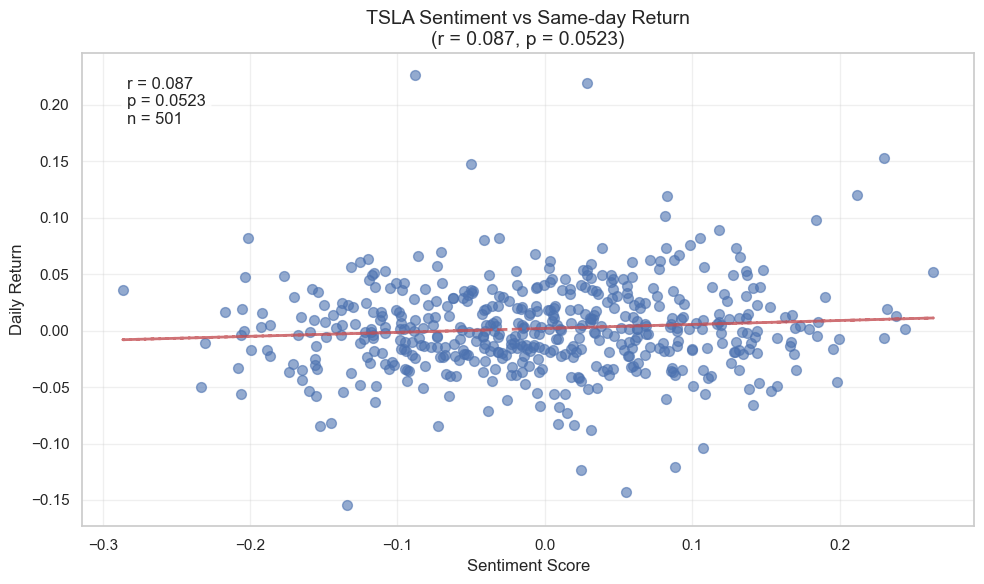

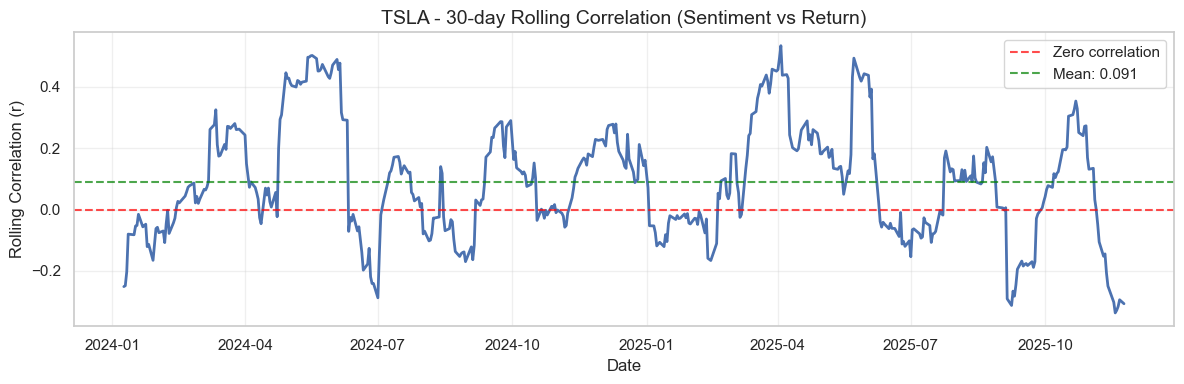


📈 ANALYZING AAPL
Sample size: 501 days
Sentiment range: -0.368 to 0.261
Return range: -0.092 to 0.153


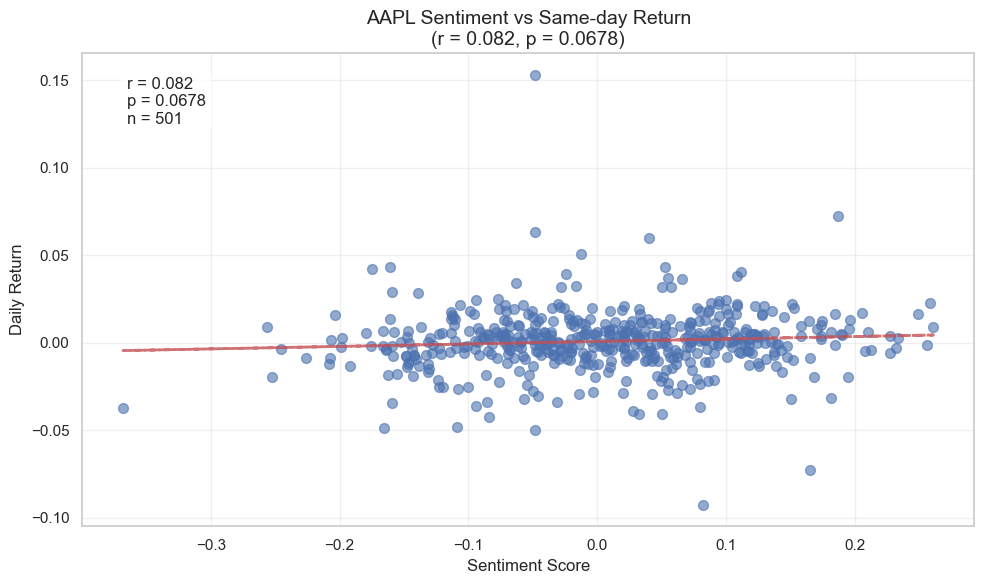

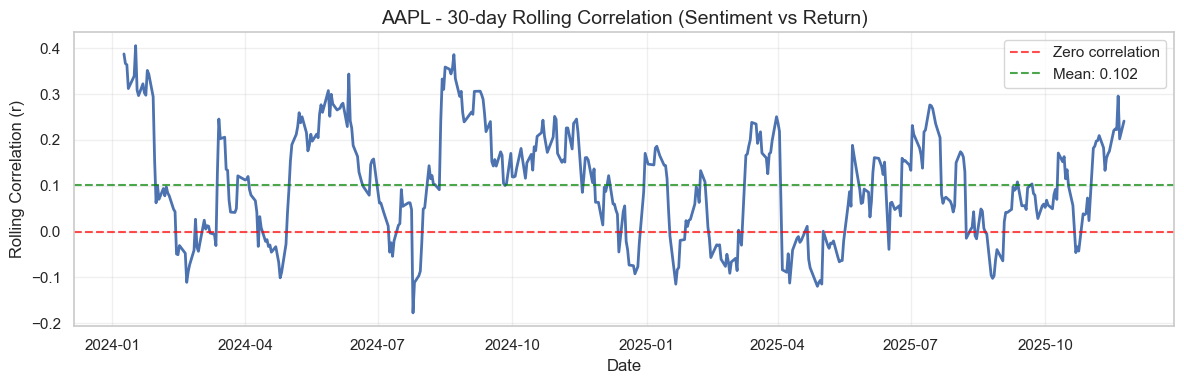


📈 ANALYZING NVDA
Sample size: 501 days
Sentiment range: -0.361 to 0.368
Return range: -0.170 to 0.187


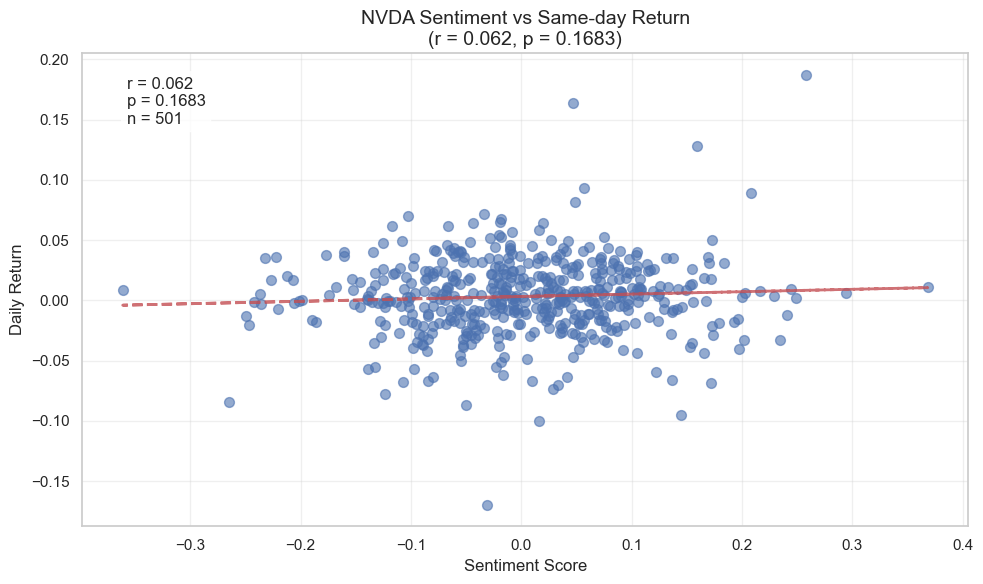

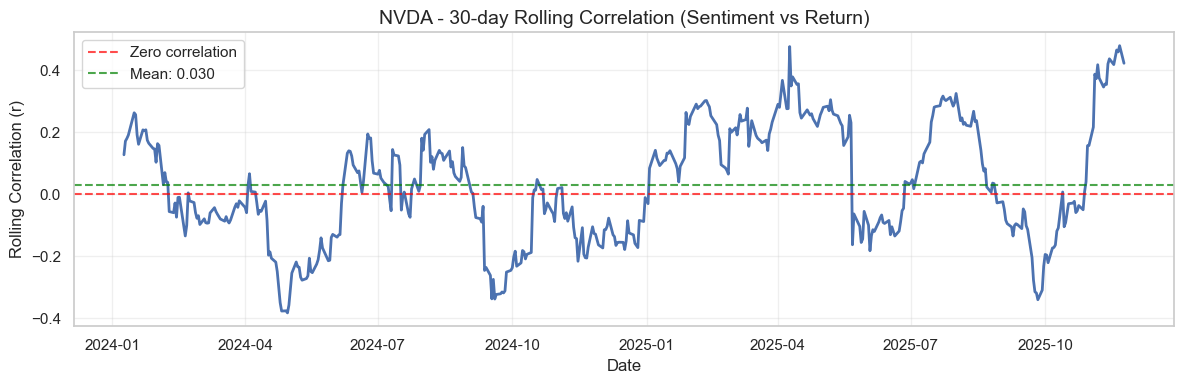


📈 ANALYZING MSFT
Sample size: 501 days
Sentiment range: -0.315 to 0.338
Return range: -0.062 to 0.101


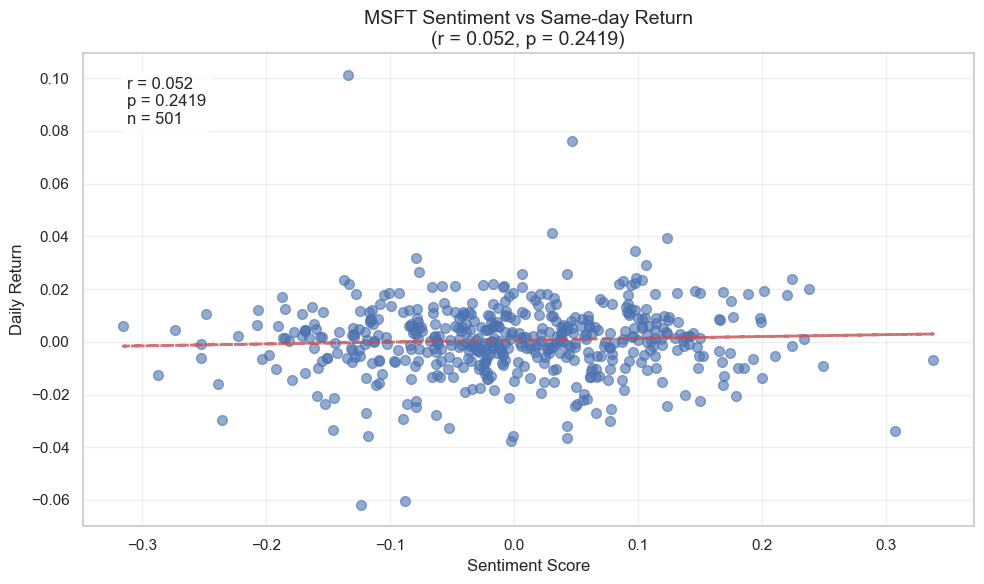

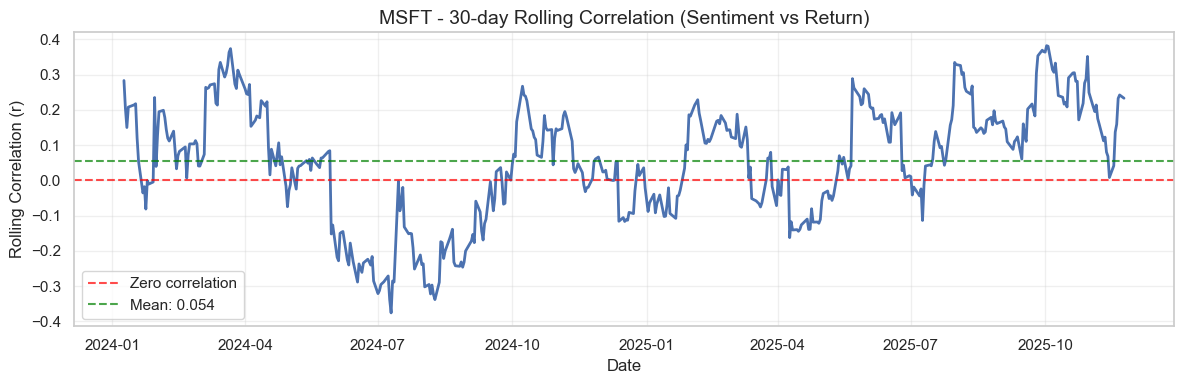


📈 ANALYZING META
Sample size: 501 days
Sentiment range: -0.293 to 0.243
Return range: -0.113 to 0.203


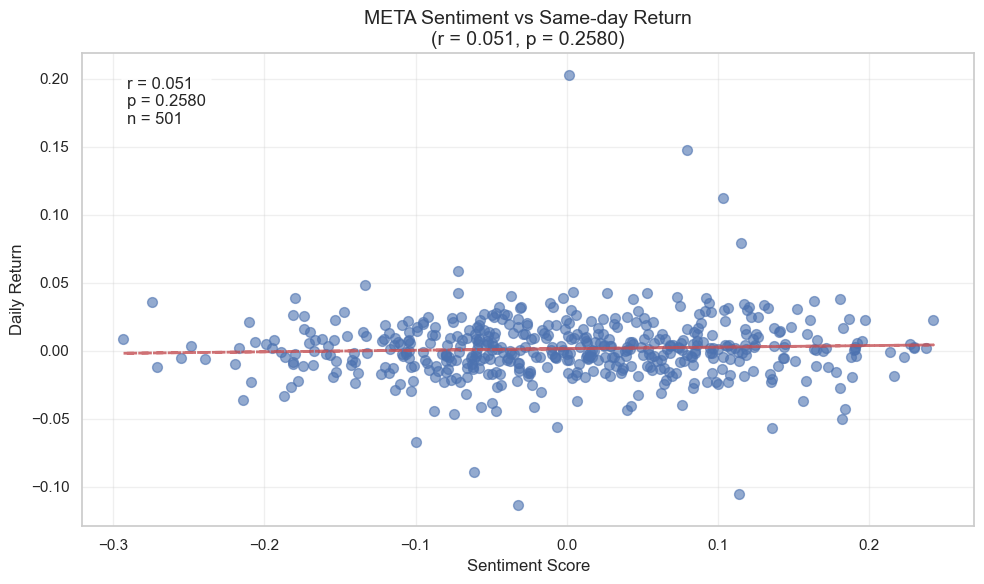

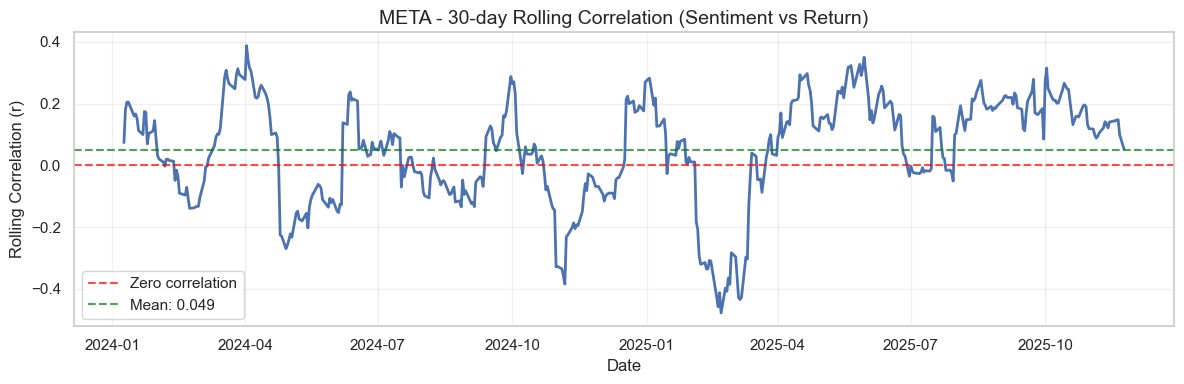


📈 ANALYZING GOOGL
Sample size: 501 days
Sentiment range: -0.368 to 0.282
Return range: -0.075 to 0.102


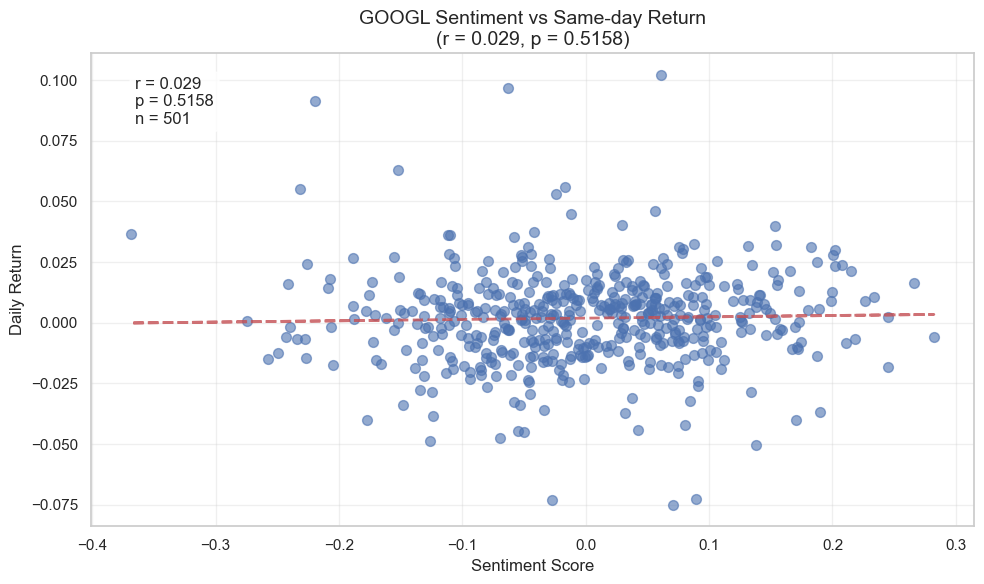

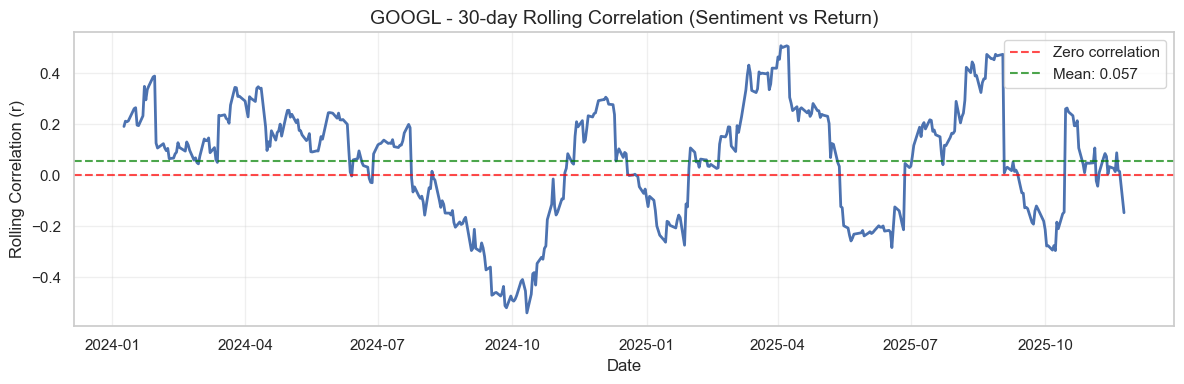

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

def scatter_plot_sentiment_vs_returns(df, sentiment_col='daily_compound_mean', return_col='return', title="Sentiment vs Returns"):
    """
    Create a scatter plot of sentiment vs returns with correlation line
    """
    plt.figure(figsize=(10, 6))
    
    # Calculate correlation
    correlation = pearsonr(df[sentiment_col], df[return_col])
    r_value = correlation[0]
    p_value = correlation[1]
    
    # Create scatter plot
    plt.scatter(df[sentiment_col], df[return_col], alpha=0.6, s=50)
    
    # Add regression line
    z = np.polyfit(df[sentiment_col], df[return_col], 1)
    p = np.poly1d(z)
    plt.plot(df[sentiment_col], p(df[sentiment_col]), "r--", alpha=0.8, linewidth=2)
    
    # Customize plot
    plt.xlabel('Sentiment Score', fontsize=12)
    plt.ylabel('Daily Return', fontsize=12)
    plt.title(f'{title}\n(r = {r_value:.3f}, p = {p_value:.4f})', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Add correlation info to plot
    plt.text(0.05, 0.95, f'r = {r_value:.3f}\np = {p_value:.4f}\nn = {len(df)}', 
             transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
             verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Choose 6 companies - let's pick the top ones from our correlation analysis
companies = summary_df.index[:6].tolist()  # Top 6 companies by same-day correlation
print(f"📊 Analyzing 6 companies: {companies}")

# Create a comprehensive analysis for each company
for t in companies:
    print(f"\n{'='*60}")
    print(f"📈 ANALYZING {t}")
    print(f"{'='*60}")
    
    df = merged_dfs[t].copy().sort_values('date')
    
    print(f"Sample size: {len(df)} days")
    print(f"Sentiment range: {df['daily_compound_mean'].min():.3f} to {df['daily_compound_mean'].max():.3f}")
    print(f"Return range: {df['return'].min():.3f} to {df['return'].max():.3f}")
    
    # Create scatter plot for same-day returns
    scatter_plot_sentiment_vs_returns(
        df, 
        sentiment_col='daily_compound_mean', 
        return_col='return', 
        title=f"{t} Sentiment vs Same-day Return"
    )
    
    # Rolling correlation (30 days)
    df_idx = df.copy()
    df_idx['date_dt'] = pd.to_datetime(df_idx['date'])
    df_idx = df_idx.set_index('date_dt').sort_index()
    rolling_corr = df_idx['daily_compound_mean'].rolling(30).corr(df_idx['return'])
    
    plt.figure(figsize=(12, 4))
    plt.plot(rolling_corr.index, rolling_corr.values, linewidth=2)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Zero correlation')
    plt.axhline(y=rolling_corr.mean(), color='green', linestyle='--', alpha=0.7, 
                label=f'Mean: {rolling_corr.mean():.3f}')
    plt.title(f"{t} - 30-day Rolling Correlation (Sentiment vs Return)", fontsize=14)
    plt.ylabel("Rolling Correlation (r)")
    plt.xlabel("Date")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

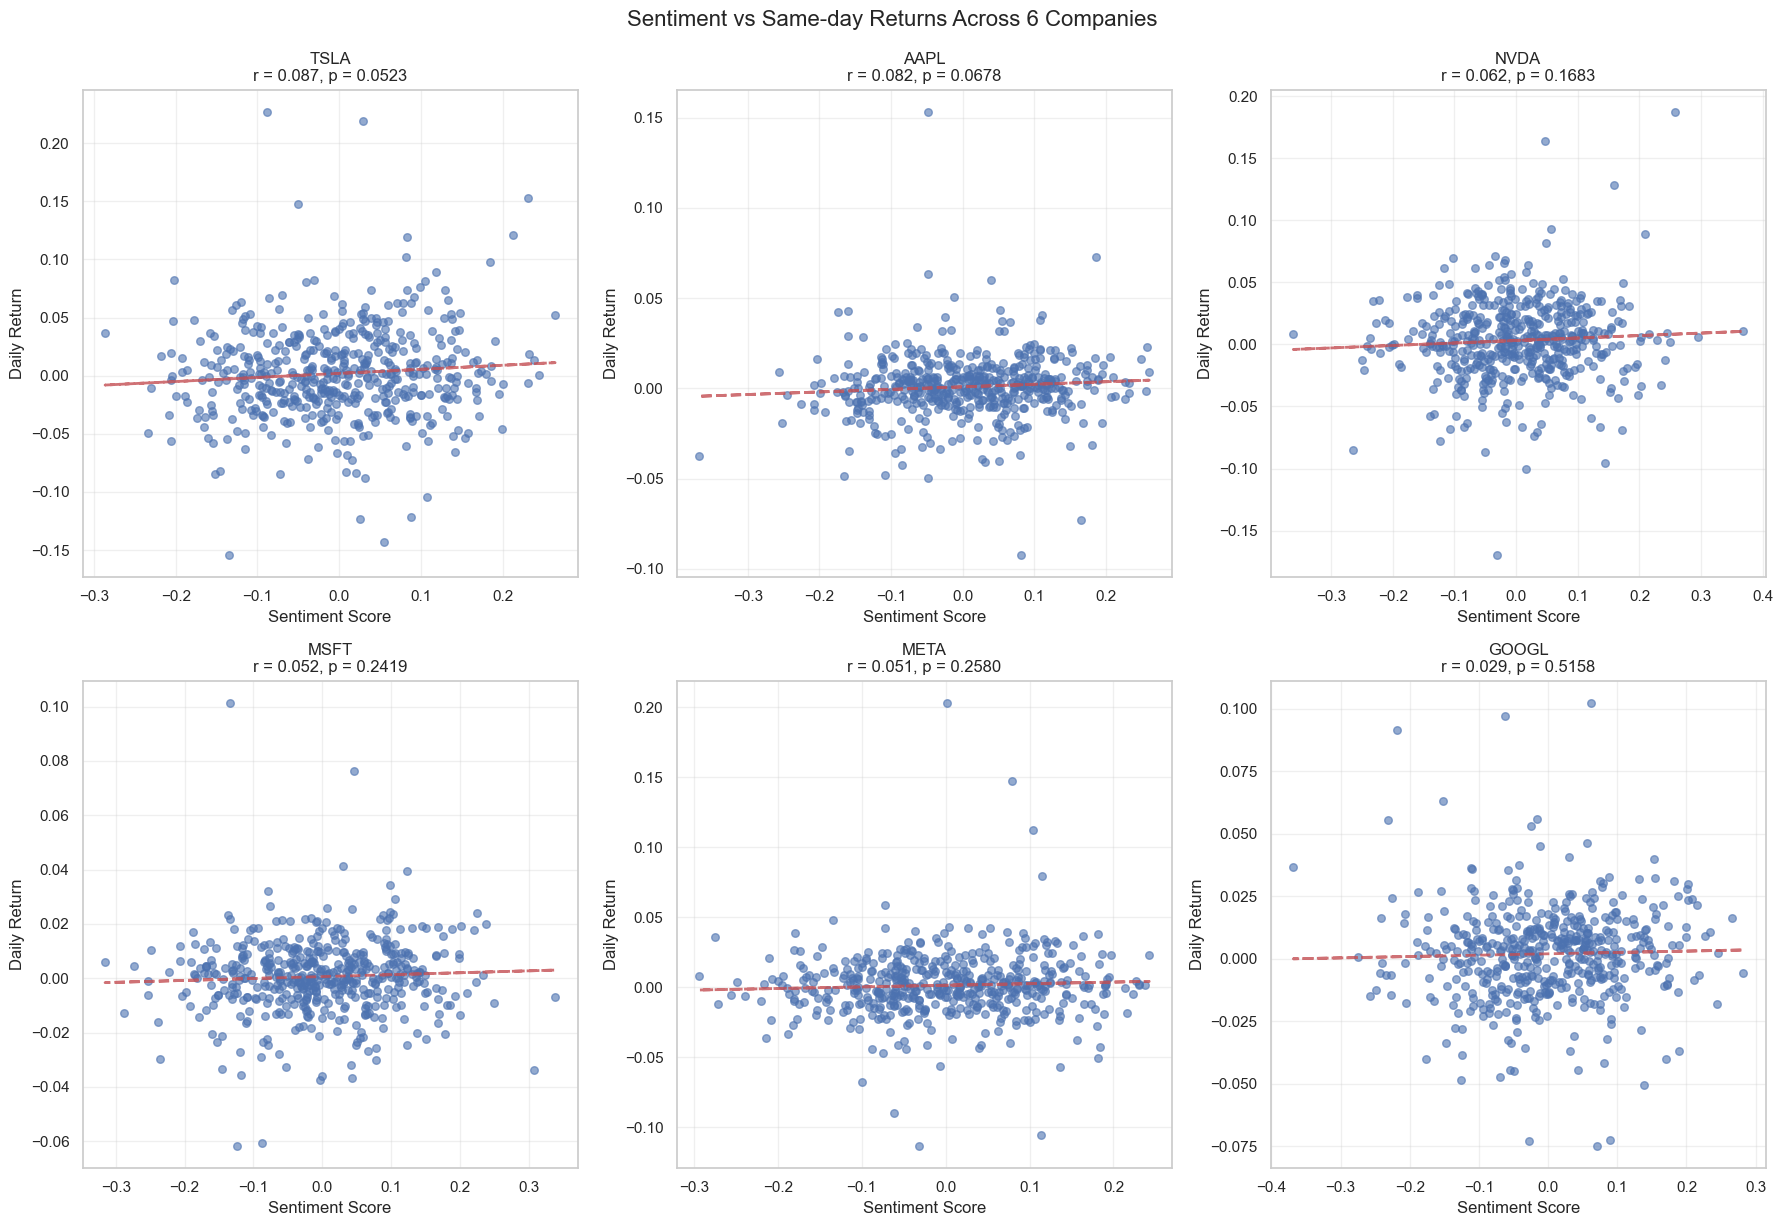

In [8]:

# Create side-by-side comparison plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, t in enumerate(companies):
    df = merged_dfs[t].copy().sort_values('date')
    
    # Calculate correlation
    correlation = pearsonr(df['daily_compound_mean'], df['return'])
    r_value = correlation[0]
    p_value = correlation[1]
    
    # Create scatter plot in subplot
    axes[i].scatter(df['daily_compound_mean'], df['return'], alpha=0.6, s=30)
    
    # Add regression line
    z = np.polyfit(df['daily_compound_mean'], df['return'], 1)
    p = np.poly1d(z)
    axes[i].plot(df['daily_compound_mean'], p(df['daily_compound_mean']), "r--", alpha=0.8, linewidth=2)
    
    # Customize subplot
    axes[i].set_xlabel('Sentiment Score')
    axes[i].set_ylabel('Daily Return')
    axes[i].set_title(f'{t}\nr = {r_value:.3f}, p = {p_value:.4f}')
    axes[i].grid(True, alpha=0.3)
    
    # Add significance marker
    if p_value < 0.05:
        axes[i].text(0.05, 0.95, '*', transform=axes[i].transAxes, fontsize=20, 
                    fontweight='bold', color='red', verticalalignment='top')

plt.tight_layout()
plt.suptitle('Sentiment vs Same-day Returns Across 6 Companies', fontsize=16, y=1.02)
plt.show()

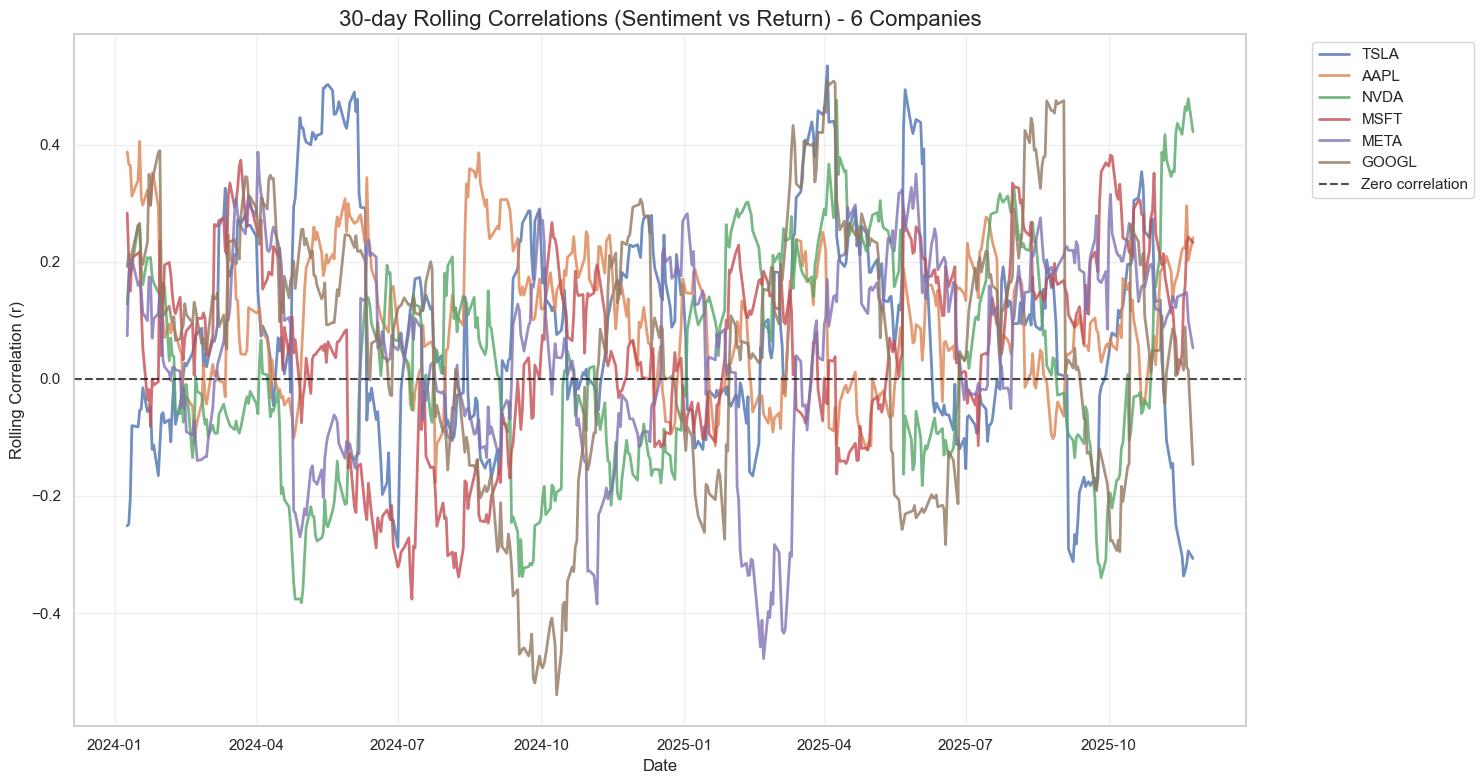

In [9]:
# Compare rolling correlations across all 6 companies
plt.figure(figsize=(15, 8))

for t in companies:
    df = merged_dfs[t].copy().sort_values('date')
    df_idx = df.copy()
    df_idx['date_dt'] = pd.to_datetime(df_idx['date'])
    df_idx = df_idx.set_index('date_dt').sort_index()
    rolling_corr = df_idx['daily_compound_mean'].rolling(30).corr(df_idx['return'])
    
    plt.plot(rolling_corr.index, rolling_corr.values, linewidth=2, label=t, alpha=0.8)

plt.axhline(y=0, color='black', linestyle='--', alpha=0.7, label='Zero correlation')
plt.title("30-day Rolling Correlations (Sentiment vs Return) - 6 Companies", fontsize=16)
plt.ylabel("Rolling Correlation (r)")
plt.xlabel("Date")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


🔍 NEXT-DAY CORRELATION ANALYSIS
TSLA: r = 0.001, p = 0.9813 
AAPL: r = 0.049, p = 0.2765 
NVDA: r = -0.013, p = 0.7668 
MSFT: r = 0.056, p = 0.2137 
META: r = -0.026, p = 0.5562 
GOOGL: r = -0.003, p = 0.9388 


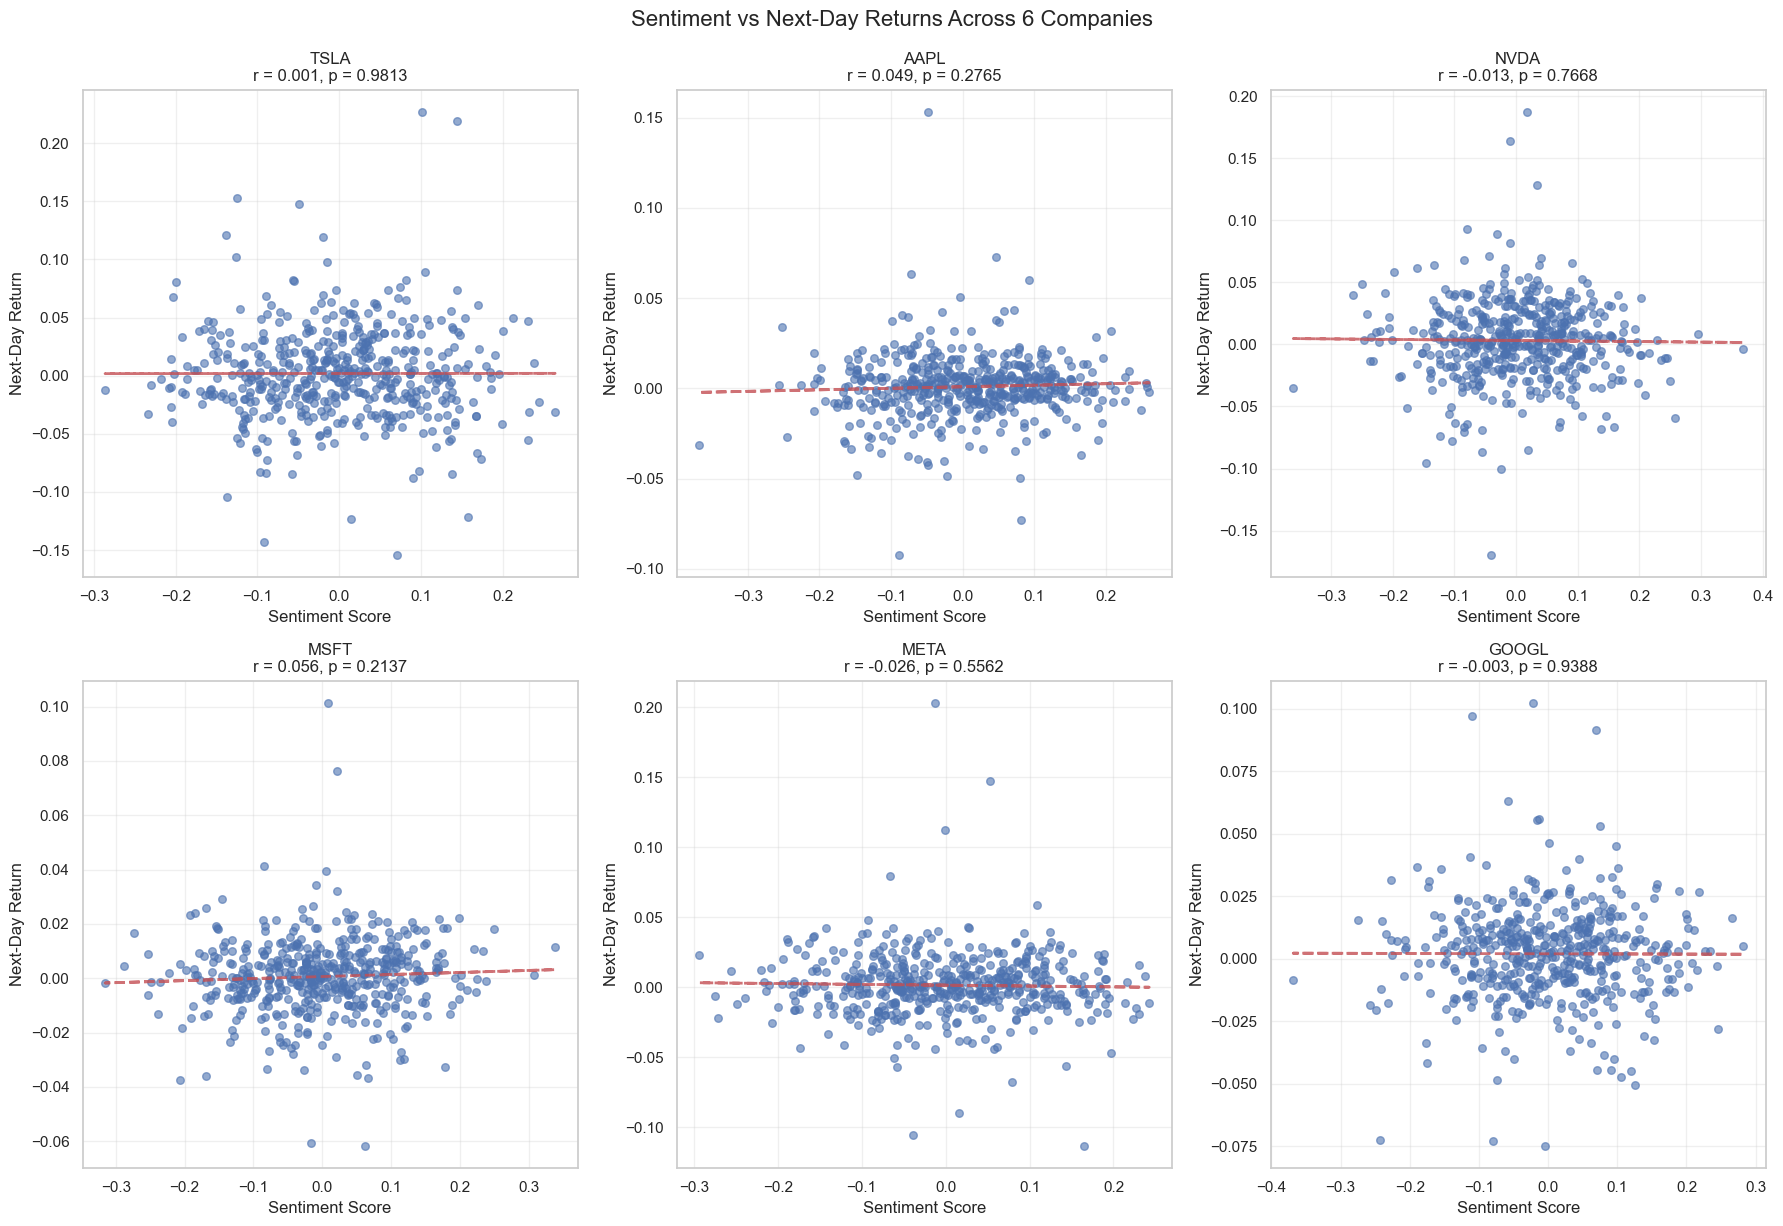

In [10]:
# Analyze next-day returns for all 6 companies
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

print("\n🔍 NEXT-DAY CORRELATION ANALYSIS")
print("="*50)

for i, t in enumerate(companies):
    df = merged_dfs[t].copy().sort_values('date')
    
    # Calculate next-day correlation
    correlation = pearsonr(df['daily_compound_mean'], df['next_return'])
    r_value = correlation[0]
    p_value = correlation[1]
    
    print(f"{t}: r = {r_value:.3f}, p = {p_value:.4f} {'*' if p_value < 0.05 else ''}")
    
    # Create scatter plot in subplot
    axes[i].scatter(df['daily_compound_mean'], df['next_return'], alpha=0.6, s=30)
    
    # Add regression line
    z = np.polyfit(df['daily_compound_mean'], df['next_return'], 1)
    p = np.poly1d(z)
    axes[i].plot(df['daily_compound_mean'], p(df['daily_compound_mean']), "r--", alpha=0.8, linewidth=2)
    
    # Customize subplot
    axes[i].set_xlabel('Sentiment Score')
    axes[i].set_ylabel('Next-Day Return')
    axes[i].set_title(f'{t}\nr = {r_value:.3f}, p = {p_value:.4f}')
    axes[i].grid(True, alpha=0.3)
    
    # Add significance marker
    if p_value < 0.05:
        axes[i].text(0.05, 0.95, '*', transform=axes[i].transAxes, fontsize=20, 
                    fontweight='bold', color='red', verticalalignment='top')

plt.tight_layout()
plt.suptitle('Sentiment vs Next-Day Returns Across 6 Companies', fontsize=16, y=1.02)
plt.show()


📊 COMPREHENSIVE SUMMARY - 6 COMPANIES
Ticker  Same-Day r  Same-Day p  Next-Day r  Next-Day p  Sample Size  Mean Sentiment  Mean Return  Same-Day Significant  Next-Day Significant
  TSLA    0.086739    0.052344    0.001050    0.981300          501       -0.002454     0.001926                 False                 False
  AAPL    0.081659    0.067812    0.048713    0.276477          501        0.006100     0.000920                 False                 False
  NVDA    0.061645    0.168308   -0.013283    0.766784          501        0.002786     0.003175                 False                 False
  MSFT    0.052376    0.241918    0.055651    0.213683          501       -0.002243     0.000574                 False                 False
  META    0.050628    0.258014   -0.026351    0.556227          501       -0.000406     0.001491                 False                 False
 GOOGL    0.029097    0.515827   -0.003439    0.938804          501       -0.001229     0.001890                 Fa

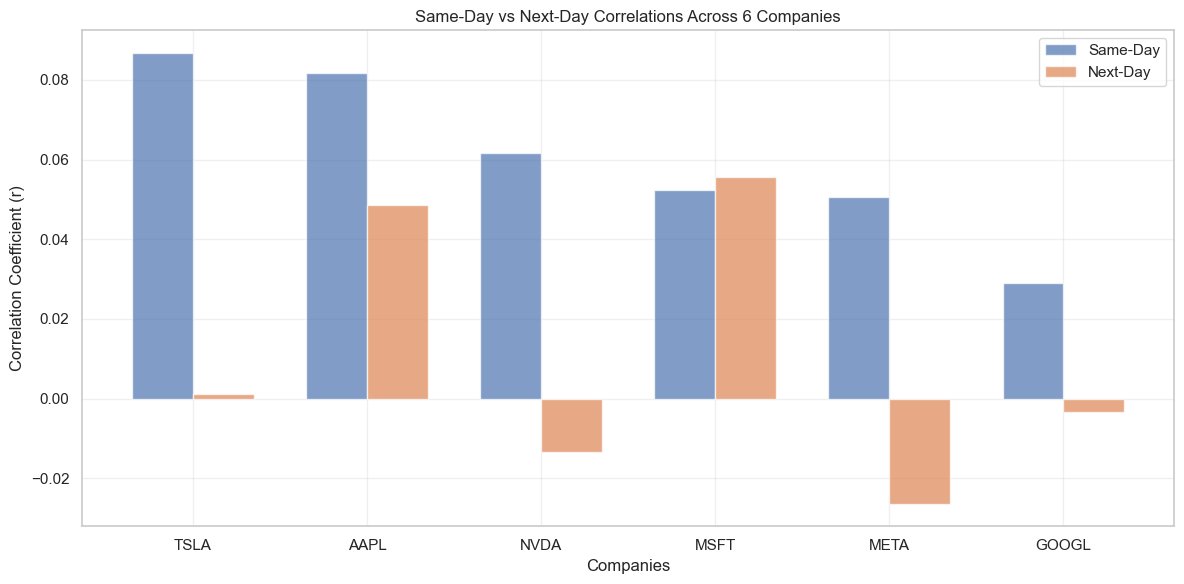


🎯 KEY INSIGHTS:
• Companies with significant same-day correlations: 0/6
• Companies with significant next-day correlations: 0/6
• Strongest same-day correlation: TSLA
• Strongest next-day correlation: MSFT
• Average same-day correlation: 0.060
• Average next-day correlation: 0.010


In [11]:
# Create a comprehensive summary dashboard
print("\n📊 COMPREHENSIVE SUMMARY - 6 COMPANIES")
print("="*70)

summary_data = []
for t in companies:
    df = merged_dfs[t].copy().sort_values('date')
    
    # Same-day correlation
    same_corr = pearsonr(df['daily_compound_mean'], df['return'])
    # Next-day correlation
    next_corr = pearsonr(df['daily_compound_mean'], df['next_return'])
    
    summary_data.append({
        'Ticker': t,
        'Same-Day r': same_corr[0],
        'Same-Day p': same_corr[1],
        'Next-Day r': next_corr[0],
        'Next-Day p': next_corr[1],
        'Sample Size': len(df),
        'Mean Sentiment': df['daily_compound_mean'].mean(),
        'Mean Return': df['return'].mean()
    })

# Create summary DataFrame
summary_comparison = pd.DataFrame(summary_data)
summary_comparison['Same-Day Significant'] = summary_comparison['Same-Day p'] < 0.05
summary_comparison['Next-Day Significant'] = summary_comparison['Next-Day p'] < 0.05

print(summary_comparison.to_string(index=False))

# Visualization of correlation comparison
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(companies))
width = 0.35

plt.bar(x_pos - width/2, summary_comparison['Same-Day r'], width, label='Same-Day', alpha=0.7)
plt.bar(x_pos + width/2, summary_comparison['Next-Day r'], width, label='Next-Day', alpha=0.7)

# Add significance markers
for i, row in summary_comparison.iterrows():
    if row['Same-Day Significant']:
        plt.text(x_pos[i] - width/2, row['Same-Day r'] + 0.01, '*', ha='center', fontweight='bold', color='red')
    if row['Next-Day Significant']:
        plt.text(x_pos[i] + width/2, row['Next-Day r'] + 0.01, '*', ha='center', fontweight='bold', color='red')

plt.xlabel('Companies')
plt.ylabel('Correlation Coefficient (r)')
plt.title('Same-Day vs Next-Day Correlations Across 6 Companies')
plt.xticks(x_pos, companies)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Final insights
print("\n🎯 KEY INSIGHTS:")
print("="*50)
significant_same = summary_comparison[summary_comparison['Same-Day Significant']]
significant_next = summary_comparison[summary_comparison['Next-Day Significant']]

print(f"• Companies with significant same-day correlations: {len(significant_same)}/{len(companies)}")
print(f"• Companies with significant next-day correlations: {len(significant_next)}/{len(companies)}")
print(f"• Strongest same-day correlation: {summary_comparison.loc[summary_comparison['Same-Day r'].idxmax(), 'Ticker']}")
print(f"• Strongest next-day correlation: {summary_comparison.loc[summary_comparison['Next-Day r'].idxmax(), 'Ticker']}")
print(f"• Average same-day correlation: {summary_comparison['Same-Day r'].mean():.3f}")
print(f"• Average next-day correlation: {summary_comparison['Next-Day r'].mean():.3f}")

In [12]:
import os
import pandas as pd

# Create merged_data by combining all dataframes from merged_dfs
merged_data = pd.DataFrame()

for ticker, df in merged_dfs.items():
    df_copy = df.copy()
    df_copy['ticker'] = ticker  # Add ticker column to identify the stock
    merged_data = pd.concat([merged_data, df_copy], ignore_index=True)

print(f"✅ Combined data for {len(merged_dfs)} tickers")
print(f"📊 Total rows in merged_data: {len(merged_data)}")
print(f"📋 Columns: {merged_data.columns.tolist()}")

# Create correlation report from our existing summary_df
correlation_report = {}
for ticker, row in summary_df.iterrows():
    correlation_report[ticker] = {
        'pearson_correlation': row['r_same'],
        'correlation_strength': 'strong' if abs(row['r_same']) > 0.5 else 
                               'moderate' if abs(row['r_same']) > 0.3 else 
                               'weak' if abs(row['r_same']) > 0.1 else 'very weak',
        'p_value': row['p_same'],
        'sample_size': row['n_same']
    }

# Save merged dataset with sentiment and returns
output_path = '../data/processed/sentiment_returns_merged.csv'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
merged_data.to_csv(output_path, index=False)

# Save correlation report
correlation_df = pd.DataFrame(correlation_report).T
correlation_df.to_csv('../data/processed/correlation_metrics.csv')

print("✅ Results saved:")
print(f"- Merged data: {output_path}")
print(f"- Correlation metrics: ../data/processed/correlation_metrics.csv")

# Display key findings
best_correlation = max(correlation_report.items(), key=lambda x: abs(x[1]['pearson_correlation']))
print(f"\n🎯 KEY FINDING:")
print(f"Strongest correlation: {best_correlation[0]} = {best_correlation[1]['pearson_correlation']:.4f}")
print(f"Correlation strength: {best_correlation[1]['correlation_strength']}")

# Additional summary statistics
print(f"\n📊 SUMMARY STATISTICS:")
print(f"Total number of observations: {len(merged_data)}")
print(f"Number of unique stocks: {merged_data['ticker'].nunique()}")
print(f"Date range: {merged_data['date'].min()} to {merged_data['date'].max()}")
print(f"Average same-day correlation: {summary_df['r_same'].mean():.4f}")
print(f"Stocks with significant correlations (p < 0.05): {len(summary_df[summary_df['p_same'] < 0.05])}")

✅ Combined data for 8 tickers
📊 Total rows in merged_data: 4008
📋 Columns: ['date', 'daily_compound_mean', 'ticker', 'close', 'return', 'next_return']
✅ Results saved:
- Merged data: ../data/processed/sentiment_returns_merged.csv
- Correlation metrics: ../data/processed/correlation_metrics.csv

🎯 KEY FINDING:
Strongest correlation: TSLA = 0.0867
Correlation strength: very weak

📊 SUMMARY STATISTICS:
Total number of observations: 4008
Number of unique stocks: 8
Date range: 2023-11-27 00:00:00 to 2025-11-24 00:00:00
Average same-day correlation: 0.0390
Stocks with significant correlations (p < 0.05): 0
